# Machine Learning model for Credit Card Fraud Detection

Training a prediction model to detect credit card fraud based on ~284000 dataset, using:
1. Logistic Regression model
2. Support Vector Machines (SVM) model
3. Neural Network Deep Learning model


Data from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

* Content (copied from Kaggle data page)

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Keras API is packaged inside Tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.drop('Time',axis=1, inplace=True)

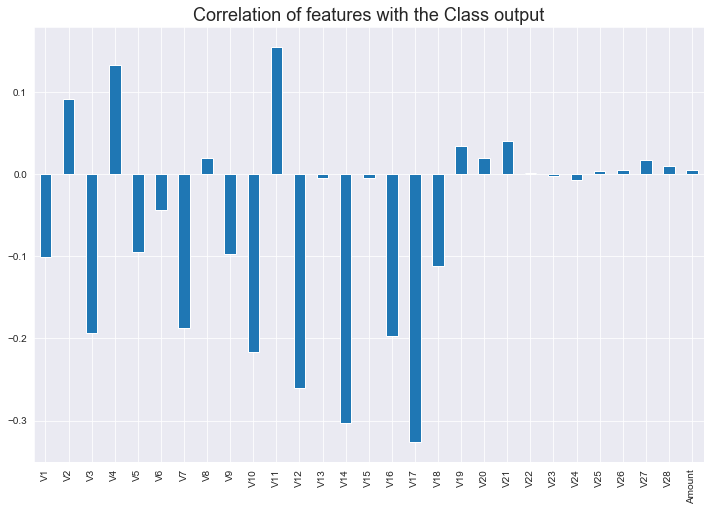

In [9]:
plt.figure(figsize=(12,8))
plt.title('Correlation of features with the Class output', fontsize=18)
df.corr()['Class'][:-1].plot(kind='bar')

# Spliting Train/Test Data

In [10]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
X_train.shape

(199364, 29)

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Fit based on X_train and transform X_train using that scale in one step
X_test = scaler.transform(X_test)

# Training a Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
predictions_log = logmodel.predict(X_test)

In [17]:
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.88      0.54      0.67       144

    accuracy                           1.00     85443
   macro avg       0.94      0.77      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
print(confusion_matrix(y_test, predictions_log)) # Confusion Matrix ([[tn, fp], [fn, tp]])

[[85288    11]
 [   66    78]]


# Training a Support Vector Machines (SVM) Model

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [20]:
# Creating a sample data, with 10% the size of the training dataset, to be used for cross validation
# We only use a sample from train dataset to avoid test data leackage
df_s = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1)
df_s = df_s.sample(frac=0.1,random_state=101) 

X_s = df_s.iloc[:,0:-1].values
y_s = df_s.iloc[:,-1].values
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.1, random_state=101)

X_train_s = scaler.transform(X_train_s)

In [21]:
pars={'C':[1,2,5,10,20,50,100], 'gamma':[0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}

In [22]:
grid = GridSearchCV(SVC(), pars, verbose=3)

In [23]:
grid.fit(X_train_s, y_train_s) # To find the corss validation to find the best parameter combination

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.998, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.998, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=0.1, score=0.998, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.998, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.998, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] ..................... C=1, gamma=0.05, score=0.998, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] ..................... C=1, gamma=0.05, score=0.998, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] ..................... C=1, gamma=0.05, score=0.998, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] ..................... C=1, gamma=0.05, score=0.998, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] .

[CV] ................... C=2, gamma=0.0005, score=0.998, total=   0.1s
[CV] C=2, gamma=0.0005 ...............................................
[CV] ................... C=2, gamma=0.0005, score=0.998, total=   0.1s
[CV] C=2, gamma=0.0005 ...............................................
[CV] ................... C=2, gamma=0.0005, score=0.998, total=   0.1s
[CV] C=2, gamma=0.0001 ...............................................
[CV] ................... C=2, gamma=0.0001, score=0.998, total=   0.1s
[CV] C=2, gamma=0.0001 ...............................................
[CV] ................... C=2, gamma=0.0001, score=0.998, total=   0.1s
[CV] C=2, gamma=0.0001 ...............................................
[CV] ................... C=2, gamma=0.0001, score=0.998, total=   0.1s
[CV] C=2, gamma=0.0001 ...............................................
[CV] ................... C=2, gamma=0.0001, score=0.998, total=   0.1s
[CV] C=2, gamma=0.0001 ...............................................
[CV] .

[CV] ................... C=10, gamma=0.005, score=0.998, total=   0.1s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.998, total=   0.1s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.998, total=   0.1s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.998, total=   0.1s
[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.998, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.998, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.998, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ..................... C=50, gamma=0.1, score=0.998, total=   0.1s
[CV] C=50, gamma=0.1 .................................................
[CV] ..................... C=50, gamma=0.1, score=0.998, total=   0.1s
[CV] C=50, gamma=0.05 ................................................
[CV] .................... C=50, gamma=0.05, score=0.998, total=   0.1s
[CV] C=50, gamma=0.05 ................................................
[CV] .................... C=50, gamma=0.05, score=0.998, total=   0.1s
[CV] C=50, gamma=0.05 ................................................
[CV] .................... C=50, gamma=0.05, score=0.998, total=   0.1s
[CV] C=50, gamma=0.05 ................................................
[CV] .................... C=50, gamma=0.05, score=0.998, total=   0.1s
[CV] C=50, gamma=0.05 ................................................
[CV] .................... C=50, gamma=0.05, score=0.998, total=   0.1s
[CV] C=50, gamma=0.01 ................................................
[CV] .

[CV] ................. C=100, gamma=0.0005, score=0.998, total=   0.1s
[CV] C=100, gamma=0.0005 .............................................
[CV] ................. C=100, gamma=0.0005, score=0.998, total=   0.1s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.998, total=   0.1s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.998, total=   0.1s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.998, total=   0.1s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.998, total=   0.1s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.998, total=   0.1s


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   16.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 5, 10, 20, 50, 100],
                         'gamma': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005,
                                   0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
grid.best_params_ # combination of paramters that had the best cross validation score

{'C': 1, 'gamma': 0.1}

In [25]:
model_svm = SVC(C=1, gamma=0.1)
model_svm.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
predictions_svm = model_svm.predict(X_test)

In [27]:
print(classification_report(y_test, predictions_svm))
print('\n')
print(confusion_matrix(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.87      0.76      0.81       144

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



[[85283    16]
 [   34   110]]


# Trainig a Deep Learning Neural Network Model

In [38]:
model = Sequential()

model.add(Dense(29, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
model.fit(x=X_train, y=y_train,
         validation_data= (X_test,y_test),
         batch_size=256, epochs=30)

Train on 199364 samples, validate on 85443 samples
Epoch 1/30
199364/199364 [==============================] - 2s 11us/sample - loss: 0.0393 - val_loss: 0.0113
Epoch 2/30
199364/199364 [==============================] - 2s 8us/sample - loss: 0.0112 - val_loss: 0.0057
Epoch 3/30
199364/199364 [==============================] - 2s 8us/sample - loss: 0.0072 - val_loss: 0.0033
Epoch 4/30
199364/199364 [==============================] - 2s 9us/sample - loss: 0.0058 - val_loss: 0.0038
Epoch 5/30
199364/199364 [==============================] - 2s 9us/sample - loss: 0.0055 - val_loss: 0.0033
Epoch 6/30
199364/199364 [==============================] - 2s 8us/sample - loss: 0.0052 - val_loss: 0.0036
Epoch 7/30
199364/199364 [==============================] - 2s 9us/sample - loss: 0.0049 - val_loss: 0.0037
Epoch 8/30
199364/199364 [==============================] - 2s 8us/sample - loss: 0.0050 - val_loss: 0.0037
Epoch 9/30
199364/199364 [==============================] - 2s 9us/sample - loss: 0.

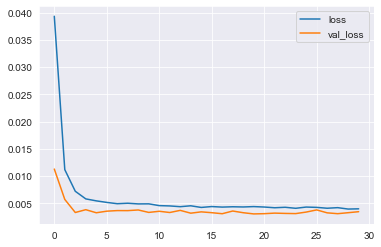

In [40]:
pd.DataFrame(model.history.history).plot()

# Evaluating the Deep Learning model

In [41]:
predictions = model.predict_classes(X_test)

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.88      0.78      0.83       144

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [43]:
print(confusion_matrix(y_test, predictions)) # Confusion Matrix ([[tn, fp], [fn, tp]])

[[85284    15]
 [   31   113]]


# Testing the model on a single data point

In [44]:
import random
rndm_id = random.randint(0,len(df))

In [45]:
new_data = df.drop('Class',axis=1).iloc[rndm_id]
new_data = scaler.transform(new_data.values.reshape(1,new_data.shape[0]))

In [46]:
model.predict_classes(new_data) # Model predicted value/class

array([[0]])

In [47]:
df.iloc[rndm_id]['Class'] # Observed value/class

0.0